# RUSYA UKRAYNA SAVAŞI: RUS ORDUSUNUN ZAYİAT SAYISI TAHMİNİ (LINEAR REGRESSION)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
RPersonelLoss = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_personnel.csv')
REquipmentLoss = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment_correction.csv')


In [3]:


RPersonelLoss = RPersonelLoss.drop('personnel*', axis = 'columns')


In [4]:
RPersonelLoss = RPersonelLoss.sort_values('date')


In [5]:
RPersonelLoss.fillna(0, inplace = True)

In [6]:
RPersonelLoss

,date,day,personnel,POW
1066,2022-02-25,2,2800,0.0
1065,2022-02-26,3,4300,0.0
1064,2022-02-27,4,4500,0.0
1063,2022-02-28,5,5300,0.0
1062,2022-03-01,6,5710,200.0
...,...,...,...,...
4,2025-01-22,1064,823980,0.0
3,2025-01-23,1065,825320,0.0
2,2025-01-24,1066,826820,0.0
1,2025-01-25,1067,828470,0.0


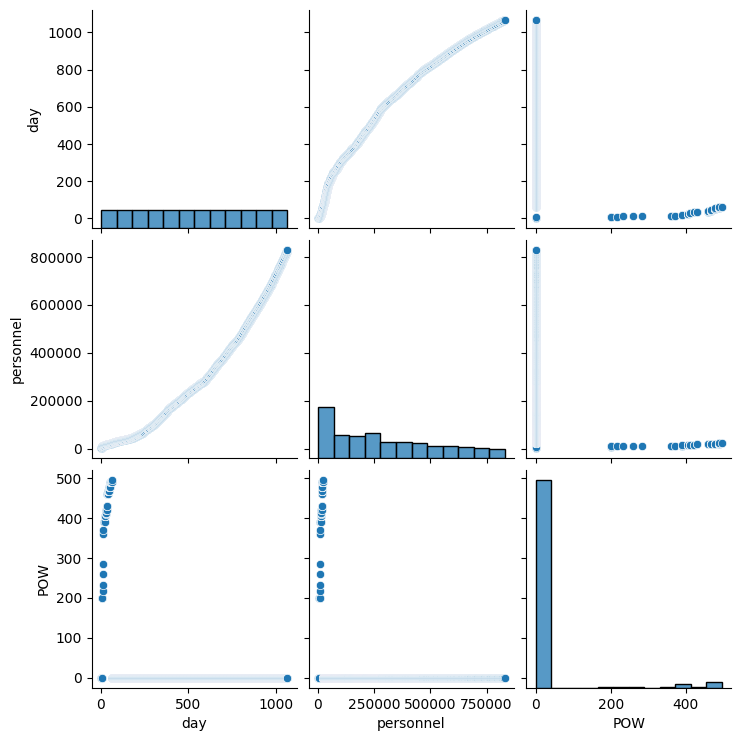

In [7]:
sns.pairplot(RPersonelLoss, vars = ['day', 'personnel', 'POW'])
plt.show()

# Burada sadece gün ve zayiat arasında anlamlı bir ilişki kurabiliyoruz

<Axes: xlabel='day', ylabel='personnel'>

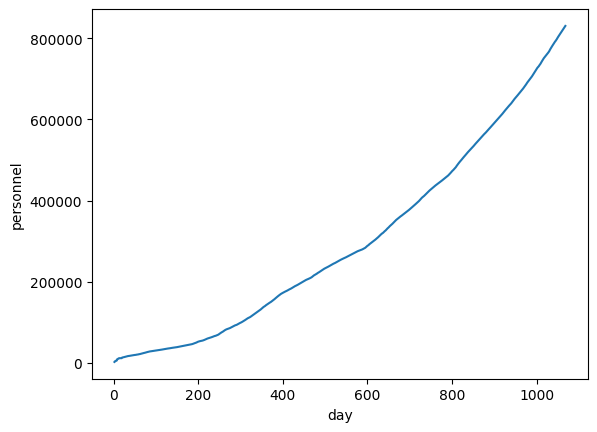

In [8]:
sns.lineplot(RPersonelLoss, x='day', y='personnel')

In [9]:
x = RPersonelLoss['day']
y = RPersonelLoss['personnel']
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

In [10]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(x, y)
x_predict = [[1478]]
y_predict = regr.predict(x_predict)
print(y_predict)

[[1006072.27979683]]


# Modelimize göre savaşın 1478'nci günü(12 Mart 2026) Rus ordusunun toplam zayiat sayısı 1.000.000(bir milyon)'u geçecek.

# Modelimizin tutarlı/isabetli olup olmadığını görmek için R^2'sine bakalım.

In [11]:
from sklearn.metrics import r2_score
r_squared = regr.score(x, y)
print(r_squared)

0.9553734754209622


# Modelimizin R^2'i 0.95 çıktı. Yani modelimizin tutarlı/isabetli olduğunu söyleyebiliriz.